In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install chardet
import chardet

with open('spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

df= pd.read_csv('spam.csv', encoding=encoding)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2. EDA ( Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation of Model

In [ ]:
# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Will have to drop last 3 columns as it doesnt have a any usefull data

In [6]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] ,inplace= True)

In [7]:
df.sample(5)

,v1,v2
4362,ham,Evry Emotion dsn't hav Words.Evry Wish dsn't h...
3436,ham,Then what about further plan?
3136,ham,You're right I have now that I think about it
2574,spam,Your next amazing xxx PICSFREE1 video will be ...
4484,ham,What not under standing.


In [8]:
# Now lets rename the columns as we cannot understand anything by looking at V1 and V2
# We will rename V1 as Target and V2 as text

In [9]:
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace= True)

In [10]:
df.sample(5)

,Target,Text
1572,spam,Ur cash-balance is currently 500 pounds - to m...
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
5336,ham,Sounds better than my evening im just doing my...
2935,ham,And stop wondering \wow is she ever going to s...
1846,ham,Its on in engalnd! But telly has decided it wo...


In [11]:
# Now lets apply Label Encoder for Target column.

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [13]:
df['Target']= encoder.fit_transform(df['Target'])

In [14]:
df.sample(5)

,Target,Text
1496,0,I'm always on yahoo messenger now. Just send t...
1219,0,True. It is passable. And if you get a high sc...
5037,0,Thanks for being there for me just to talk to ...
805,0,I dled 3d its very imp
2337,0,Tell your friends what you plan to do on Valen...


In [15]:
# Lets check missing values

In [16]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
# Lets check duplicate values

In [18]:
df.duplicated().sum()

403

In [19]:
df= df.drop_duplicates(keep= 'first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

In [22]:
# Next Step i.e EDA ( Exploratory Data Analysis )

In [23]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

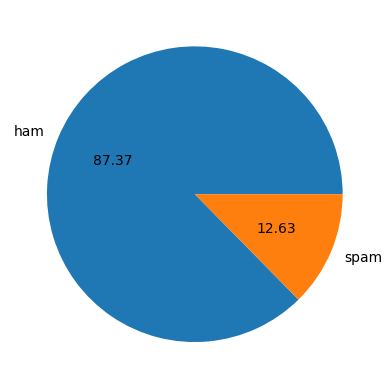

In [25]:
plt.pie(df['Target'].value_counts(), labels= ['ham', 'spam'], autopct= "%0.2f")
plt.show()

In [26]:
# Here we can clearly see that data is unbalanced and we have to consider this the whole time we work on this data.

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
# Now we will count number of characters in every row in Text column.

In [30]:
df['Num_characters']= df['Text'].apply(len)

In [31]:
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# Now lets count number of words in each row of the text column

In [33]:
df['Num_words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Now lets count number of sentences in each row of the text column

In [35]:
df['Num_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
# Now lets analyze all the 3 new columns

In [38]:
df[['Num_characters', 'Num_words', 'Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# Now we will analyze these new columns in terms of HAM AND SPAM

In [40]:
# THIS IS FOR HAM
df[df['Target']== 0][['Num_characters', 'Num_words', 'Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
# THIS IS FOR SPAM
df[df['Target']== 1][['Num_characters', 'Num_words', 'Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [42]:
# HERE WE CAN CLEARLY SEE THAT NO OF CHARACTERS USED ARE MORE IN SPAM.

In [43]:
# NOW LETS FIND OUT IF THERE IS MULTI COLLINEARITY BETWEEN THESE 3 COLUMNS

In [44]:
import seaborn as sns

<Axes: xlabel='Num_characters', ylabel='Count'>

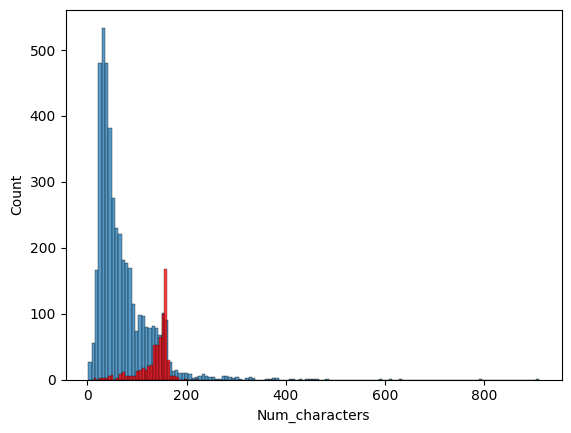

In [45]:
sns.histplot(df[df['Target']== 0]['Num_characters'])
sns.histplot(df[df['Target']== 1]['Num_characters'], color= 'red')

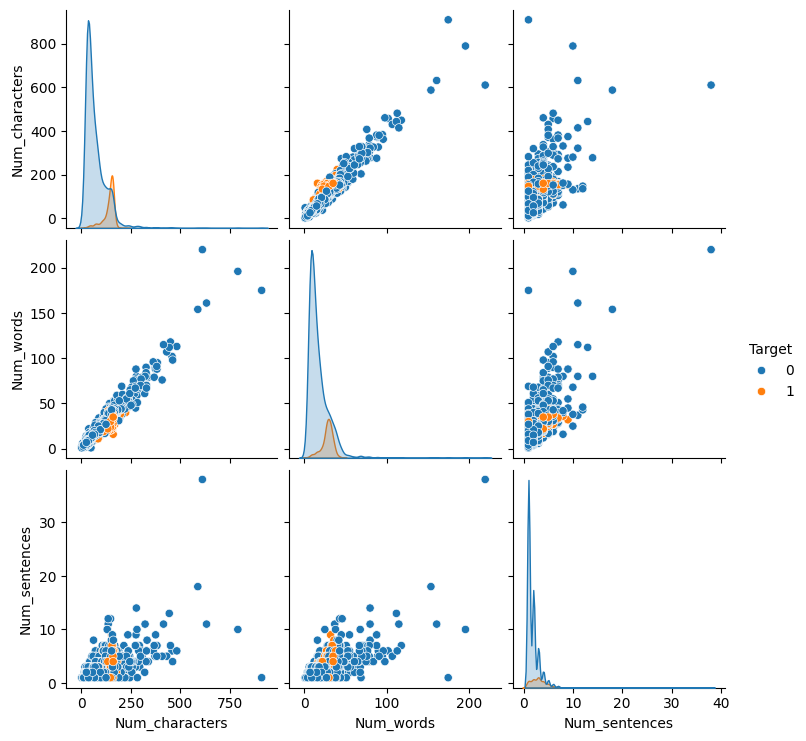

In [46]:
sns.pairplot(df, hue= 'Target')

In [47]:
df.sample(5)

,Target,Text,Num_characters,Num_words,Num_sentences
2456,0,Onum ela pa. Normal than.,25,6,1
4652,0,Lol yes. But it will add some spice to your day.,48,13,2
1364,0,Hey i will be really pretty late... You want t...,114,28,3
344,0,My sister cleared two round in birla soft yest...,52,10,1
1278,0,Can i meet Ì_ at 5.. As 4 where depends on whe...,66,19,1


In [48]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df)

      Target  Num_characters  Num_words  Num_sentences
0          0             111         24              2
1          0              29          8              2
2          1             155         37              2
3          0              49         13              1
4          0              61         15              1
...      ...             ...        ...            ...
5567       1             161         35              4
5568       0              37          9              1
5569       0              57         15              2
5570       0             125         27              1
5571       0              26          7              2

[5169 rows x 4 columns]


In [50]:
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                  Target  Num_characters  Num_words  Num_sentences
Target          1.000000        0.384717   0.262912       0.263939
Num_characters  0.384717        1.000000   0.965760       0.624139
Num_words       0.262912        0.965760   1.000000       0.679971
Num_sentences   0.263939        0.624139   0.679971       1.000000


<Axes: >

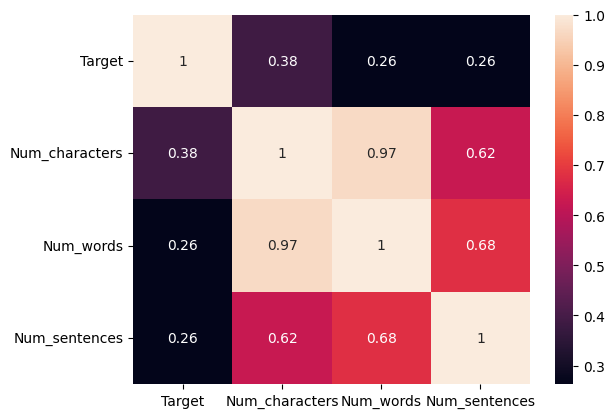

In [51]:
sns.heatmap((correlation_matrix), annot = True)

In [52]:
df.Text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [53]:
# TEST PREPROSING
# 1. LOWER CASE
# 2. TOKENIZATION
# 3. REMOVING SPECIAL CHARACTERS
# 4. REMOVING STOPWORDS AND PUNCTUATION
# 5. STEMMING

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
# Stemming

In [58]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


In [59]:
ps.stem('dancing')

'danc'

In [60]:
def final_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)

    j = []
    for i in text:
      if i.isalnum():
        j.append(i)

    text= j[:]
    j.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        j.append(i)

    text= j[:]
    j.clear()

    for i in text:
     j.append(ps.stem(i))
    return " ".join(j)

In [61]:
 final_text("I loved YOUR Presentation !!! Did you like my presentation on ML?")

'love present like present ml'

In [62]:
df['Final_text']= df['Text'].apply(final_text)

In [63]:
df['Final_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Final_text, Length: 5169, dtype: object

In [64]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Final_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
  from wordcloud import WordCloud
  wc= WordCloud( width= 500, height= 500, min_font_size= 10, background_color= 'white')

In [66]:
spam_wc= wc.generate(df[df['Target']== 1]['Final_text'].str.cat(sep= " "))

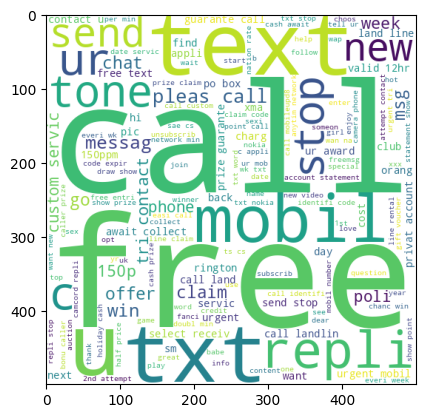

In [67]:
plt.imshow(spam_wc)

In [68]:
ham_wc= wc.generate(df[df['Target']== 0]['Final_text'].str.cat(sep= " "))

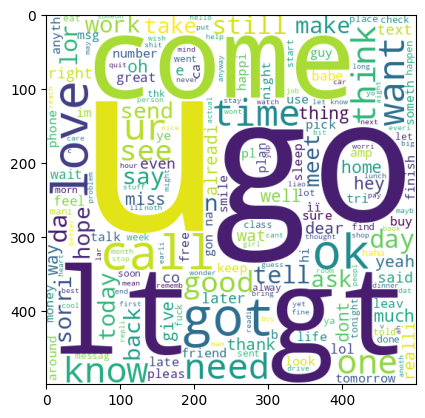

In [69]:
plt.imshow(ham_wc)

In [70]:
# Lets find out top 30 words used in spam and ham
# We can see it in Word Cloud but lets find out from other method

In [71]:
spam_corpus= []
for msg in df[df['Target']== 1]['Final_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [72]:
len(spam_corpus)

9939

In [73]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [74]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [75]:
ham_corpus= []
for msg in df[df['Target']== 0]['Final_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [76]:
len(ham_corpus)

35404

In [77]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [78]:
#MODEL BUILDING

In [79]:
# NOW WE NEED TO CONVERT THE INPUT TEXT INTO VECTORS SO WE CAN USE THEM IN MODEL AS MODELS WORK ONLY ON NUMBERS
# wE WILL VECTORIZE OUR DATA USING BAG OF WORDS

In [80]:
# SMS  Filtering: If an SMS filtering system marks a legitimate SMS as spam (false positive),
# It can cause users to miss important communications. Ensuring that only actual spam is filtered out is crucial.
# In this type of scenerio Precsion Score matters more than any other metrics.

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [82]:
X= cv.fit_transform(df['Final_text']).toarray()

In [83]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [84]:
X.shape

(5169, 6708)

In [85]:
y= df['Target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)

In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [91]:
Gnb= GaussianNB()
Mnb= MultinomialNB()
Bnb= BernoulliNB()

In [92]:
# We are trying Gaussian NaiveBayes first
Gnb.fit(X_train, y_train)
y_pred1= Gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [93]:
# NOW We are trying Multinomial NaiveBayes
Mnb.fit(X_train, y_train)
y_pred2= Mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [94]:
# NOW We are trying Bernoulli NaiveBayes
Bnb.fit(X_train, y_train)
y_pred3= Bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [95]:
# Till here we can see that Bernoulli NaiveBayes is giving out best results
# Now lets try using other vectorizer that is TGIDF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()

In [97]:
X= tfidf.fit_transform(df['Final_text']).toarray()

In [98]:
y= df['Target'].values

In [99]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)

In [100]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [102]:
Gnb= GaussianNB()
Mnb= MultinomialNB()
Bnb= BernoulliNB()

In [103]:
# We are trying Gaussian NaiveBayes first
Gnb.fit(X_train, y_train)
y_pred1= Gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [104]:
# NOW We are trying Multinomial NaiveBayes
Mnb.fit(X_train, y_train)
y_pred2= Mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [105]:
# NOW We are trying Bernoulli NaiveBayes
Bnb.fit(X_train, y_train)
y_pred3= Bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [106]:
# NOW WE CAN CLEARLY SEE THAT USING TFIDF VECTORIZER AND APPLYING MULTINOMIAL NAIVE BAYES GIVES US BEST PRECISION SCORE
# NOW LETS SOME OTHER MACHINE LEARNING MODELS AND ENSEMBLE LEARNING MODELS

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [108]:
knc= KNeighborsClassifier()
mnb= MultinomialNB()
svc= SVC(kernel= 'sigmoid', gamma= 1.0 )
dt= DecisionTreeClassifier(max_depth= 5)
rf= RandomForestClassifier(n_estimators= 50, random_state=2)
etc= ExtraTreesClassifier(n_estimators= 50, random_state=2)

In [109]:
classifiers= {
    'KNN' : knc,
    'NB' : mnb,
    'SVC' : svc,
    'DTC' : dt,
    'ETC' : etc

}

In [110]:
def train_classifier(classifiers, X_train, y_train, X_test, y_test):
  classifiers.fit(X_train, y_train)
  y_pred= classifiers.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred)

  return accuracy, precision

In [111]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [112]:

accuracy_scores= []
precision_scores= []

for name, classifiers in classifiers.items():

  current_accuracy, current_precision= train_classifier(classifiers, X_train, y_train, X_test, y_test)

  print("For", name)
  print("Accuracy- ", current_accuracy)
  print("Precision- ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For KNN
Accuracy-  0.9003868471953579
Precision-  1.0
For NB
Accuracy-  0.9593810444874274
Precision-  1.0
For SVC
Accuracy-  0.9729206963249516
Precision-  0.9741379310344828
For DTC
Accuracy-  0.937137330754352
Precision-  0.8543689320388349
For ETC
Accuracy-  0.9729206963249516
Precision-  0.9824561403508771


In [113]:
performance_df= pd.DataFrame({'Algorithm': classifiers.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending= False)

AttributeError: 'ExtraTreesClassifier' object has no attribute 'keys'

In [114]:
# Assuming 'classifiers' was defined as a dictionary in a previous cell,
# restore its original value:
classifiers = {
    'KNN': knc,
    'NB': mnb,
    'SVC': svc,
    'DTC': dt,
    'ETC': etc
}

performance_df = pd.DataFrame({'Algorithm': classifiers.keys(),
                               'Accuracy': accuracy_scores,
                               'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [115]:
performance_df

,Algorithm,Accuracy,Precision
0,KNN,0.900387,1.000000
1,NB,0.959381,1.000000
4,ETC,0.972921,0.982456
2,SVC,0.972921,0.974138
3,DTC,0.937137,0.854369


In [ ]:
#N0W WE CAN CAN STILL TRY TO IMPOVISE THE MODEL BY CHANGING (MAX_FEATURES) PARAMETER OF TFIDF

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features= 3000)

In [117]:
X= tfidf.fit_transform(df['Final_text']).toarray()

In [118]:
y= df['Target'].values

In [119]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [121]:
knc= KNeighborsClassifier()
mnb= MultinomialNB()
svc= SVC(kernel= 'sigmoid', gamma= 1.0 )
dt= DecisionTreeClassifier(max_depth= 5)
rf= RandomForestClassifier(n_estimators= 50, random_state=2)
etc= ExtraTreesClassifier(n_estimators= 50, random_state=2)

In [122]:
classifiers= {
    'KNN' : knc,
    'NB' : mnb,
    'SVC' : svc,
    'DTC' : dt,
    'ETC' : etc

}

In [123]:
def train_classifier(classifiers, X_train, y_train, X_test, y_test):
  classifiers.fit(X_train, y_train)
  y_pred= classifiers.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred)

  return accuracy, precision

In [124]:

accuracy_scores= []
precision_scores= []

for name, classifiers in classifiers.items():

  current_accuracy, current_precision= train_classifier(classifiers, X_train, y_train, X_test, y_test)

  print("For", name)
  print("Accuracy- ", current_accuracy)
  print("Precision- ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For KNN
Accuracy-  0.9052224371373307
Precision-  1.0
For NB
Accuracy-  0.9709864603481625
Precision-  1.0
For SVC
Accuracy-  0.9758220502901354
Precision-  0.9747899159663865
For DTC
Accuracy-  0.9274661508704062
Precision-  0.8118811881188119
For ETC
Accuracy-  0.9748549323017408
Precision-  0.9745762711864406


In [138]:
tfidf

TfidfVectorizer(max_features=3000)

In [139]:
mnb

MultinomialNB()

In [127]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump (mnb, open('model.pkl', 'wb'))

In [129]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.9 MB/s e

In [132]:
pip install --upgrade gradio


In [135]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

iface = gr.Interface(fn=greet, inputs=gr.Textbox(), outputs=gr.Textbox())
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://902aaba5ff9facb674.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [136]:
import gradio as gr
import pickle

# Load the saved model and vectorizer
model_path = '/content/model.pkl'
vectorizer_path = '/content/vectorizer.pkl'

with open(model_path, 'rb') as f:
    model = pickle.load(f)

with open(vectorizer_path, 'rb') as f:
    vectorizer = pickle.load(f)

def classify_sms(text):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Create Gradio interface
iface = gr.Interface(
    fn=classify_sms,
    inputs=gr.Textbox(lines=2, placeholder="Enter SMS text here..."),
    outputs=gr.Textbox(),
    title="SMS Spam Detection",
    description="Enter an SMS message to classify it as Spam or Not Spam."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9cb902c51a1b3eb55b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
